# Lendal Case study
## project by Beng Cheong Cheong and Geraldine Bengsch

# Aims of the project

## Table of Contents
* [1. Data Preparation](#1-data-preparation)
* [2. Data Exploration](#2-data-exploration)
* [3. Data Analysis](#3-data-analysis)
* [4. Visualisations](#4-visualisations)


# 1. Data Preparation

The first phase of the project consisted of becoming familiar with the data set. We imported the necessary libraries, read in the data set, and inspected it.
The data set consists of 111 columns with different data types. Not all of which are relevant for investigating types of risks associated with providing clients with a loan. In addition, a considerable amount of columns does not contain any data at all. Others have missing values or contain information that is of limited use to this project.

In [1]:
# import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read data
loan = pd.read_csv('loan.csv')

C:\Users\geral\.virtualenvs\Prep-gSb9PLii\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# see the data with all columns
pd.set_option('display.max_columns', None)
# display first five rows
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
#check for columns with no data
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [5]:
#count total number of missing values in the data DataFrame
loan.isnull().sum().sum()

2263364

In [6]:
# columns to work on:
# loan_amnt, pub_rec, pub_rec_bankruptcies, revol_bal, mths_since_last_delinq, purpose
# delinq_2yrs, delinq_amnt, grade, subgrade, annual_inc
# inq_last_6mths??? 
# total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int,total_rec_late_fee
# collection_recovery_fee

# columns with only one value
# pymnt_plan, tax_liens, initial_list_status- empty



# 2. Data Exploration
Here, we want to know which data column contains which types of data so that we can decide if they should be categorical,numerical, ordinal variables

In [7]:
column_idx = 0
while column_idx <= loan.shape[1]:
    end_range = column_idx + 10
    print("-----")
    print("Printing column data types for {} to {}".format(column_idx, end_range))
    print("-----")
    print(loan.iloc[:,column_idx:end_range].info())
    column_idx = end_range + 1

-----
Printing column data types for 0 to 10
-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               39717 non-null  int64  
 1   member_id        39717 non-null  int64  
 2   loan_amnt        39717 non-null  int64  
 3   funded_amnt      39717 non-null  int64  
 4   funded_amnt_inv  39717 non-null  float64
 5   term             39717 non-null  object 
 6   int_rate         39717 non-null  object 
 7   installment      39717 non-null  float64
 8   grade            39717 non-null  object 
 9   sub_grade        39717 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.0+ MB
None
-----
Printing column data types for 11 to 21
-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  -----

# 3. Data Analysis

In [8]:
df = loan.copy()

In [9]:
def dict_counter(vals):
    var_dict = {}
    for val in vals:
        if val not in var_dict:
            var_dict[val] = 1
        else:
            var_dict[val] += 1
    return dict(sorted(var_dict.items(), key=lambda item: item[1], reverse=True))

In [10]:
# Here, we want to know which columns to be converted to numeric variables.
# For example, columns with too many numbers should be converted to numeric variables.
# Coli

term = [val for val in df['term'].values]
print(dict_counter(term))
print("\n")

emp_length = [val for val in df['emp_length'].values]
print(dict_counter(emp_length))
print("\n")

loan_status = [val for val in df['loan_status'].values]
print(dict_counter(loan_status))
print("\n")

interest_rate = [val for val in df['int_rate'].values]
print(dict_counter(interest_rate))
print("\n")

purpose = [val for val in df['purpose'].values]
print(dict_counter(purpose))
print("\n")

{' 36 months': 29096, ' 60 months': 10621}


{'10+ years': 8879, '< 1 year': 4583, '2 years': 4388, '3 years': 4095, '4 years': 3436, '5 years': 3282, '1 year': 3240, '6 years': 2229, '7 years': 1773, '8 years': 1479, '9 years': 1258, nan: 1075}


{'Fully Paid': 32950, 'Charged Off': 5627, 'Current': 1140}


{'10.99%': 956, '13.49%': 826, '11.49%': 825, '7.51%': 787, '7.88%': 725, '7.49%': 656, '11.71%': 607, '9.99%': 603, '7.90%': 582, '5.42%': 573, '11.99%': 532, '12.69%': 491, '10.37%': 468, '6.03%': 447, '12.99%': 446, '8.49%': 445, '12.42%': 442, '10.65%': 435, '5.79%': 410, '8.90%': 402, '7.29%': 397, '6.62%': 396, '11.86%': 391, '14.27%': 390, '10.59%': 380, '9.63%': 378, '9.91%': 377, '5.99%': 347, '7.14%': 341, '6.99%': 336, '11.11%': 331, '16.77%': 327, '12.53%': 327, '10.74%': 312, '6.54%': 305, '6.91%': 303, '8.94%': 294, '7.66%': 292, '13.61%': 291, '15.99%': 286, '13.98%': 284, '13.23%': 263, '11.12%': 259, '13.99%': 257, '6.17%': 252, '10.00%': 251, '12.68%': 251, '10.36

# STEPS 
 1. Purpose (Charged off vs Fully Paid)
 2. Interest rate (Charged Off vs Fully Paid) - to see the spread of the different data points of the interest rate
 3. the Term (Charged Off vs Fully Paid)
 4. Loan Amount (Charged Off vs Fully Paid) - 3 groups (High,Medium,Low)
 5. Bankruptcies (pub_rec_bankruptcies)
 6. Delinquencies 

In [11]:
print(list(df['collection_recovery_fee'].values))

[0.0, 1.11, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.09, 2.52, 0.0, 0.0, 4.16, 0.0, 6.3145, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.57, 0.0, 0.0, 2.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.07, 0.0, 0.0, 0.0, 36.3708, 0.0, 0.0, 5.49, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 152.514, 0.0, 0.0, 0.0, 3.6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 625.617, 0.0, 0.0, 2.54, 0.0, 0.0, 0.0, 0.0, 670.8193, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.2906, 0.0, 0.0, 0.0, 0.0, 0.0, 361.9044, 6.412899997, 0.0, 0.0, 563.7888, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.265000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.148900002, 0.0, 0.0, 0.0, 0.0, 0.0, 57.5028, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.4878, 0.0, 10.48, 0.0, 0.0, 0.0, 0.0, 40.78310001, 5.

In [12]:
df[df['loan_status']=='Charged Off'][['loan_amnt','term','installment','int_rate','loan_status']]

,loan_amnt,term,installment,int_rate,loan_status
1,2500,60 months,59.83,15.27%,Charged Off
8,5600,60 months,152.39,21.28%,Charged Off
9,5375,60 months,121.45,12.69%,Charged Off
12,9000,36 months,305.38,13.49%,Charged Off
14,10000,36 months,325.74,10.65%,Charged Off
...,...,...,...,...,...
39667,2500,36 months,84.00,12.80%,Charged Off
39668,2500,36 months,80.26,9.64%,Charged Off
39669,6500,36 months,225.37,15.01%,Charged Off
39678,1000,36 months,32.55,10.59%,Charged Off


In [13]:
pd.set_option('display.max_rows', None)
df2 = df[df['loan_status']=='Charged Off'][['loan_amnt','term','purpose','installment','int_rate','loan_status']]
df2.groupby('purpose').count()

,loan_amnt,term,installment,int_rate,loan_status
purpose,,,,,
car,160,160,160,160,160
credit_card,542,542,542,542,542
debt_consolidation,2767,2767,2767,2767,2767
educational,56,56,56,56,56
home_improvement,347,347,347,347,347
house,59,59,59,59,59
major_purchase,222,222,222,222,222
medical,106,106,106,106,106
moving,92,92,92,92,92


In [14]:
df[df['loan_amnt']== df['loan_amnt'].max()].shape

(679, 111)

In [15]:
# comparing Fully paid versus charged off loans
paid=df.loc[df['loan_status']=='Fully Paid']
charged_off=df.loc[df['loan_status']=='Charged Off']

In [16]:
print("Fully paid off: ", paid.count())

print("Charged off: ", charged_off.count())


Fully paid off:  id                                32950
member_id                         32950
loan_amnt                         32950
funded_amnt                       32950
funded_amnt_inv                   32950
term                              32950
int_rate                          32950
installment                       32950
grade                             32950
sub_grade                         32950
emp_title                         31048
emp_length                        32145
home_ownership                    32950
annual_inc                        32950
verification_status               32950
issue_d                           32950
loan_status                       32950
pymnt_plan                        32950
url                               32950
desc                              22225
purpose                           32950
title                             32941
zip_code                          32950
addr_state                        32950
dti                    

# 4. Visualisations

Text(0.5, 1.0, 'Paid off vs. Charged off loans in %')

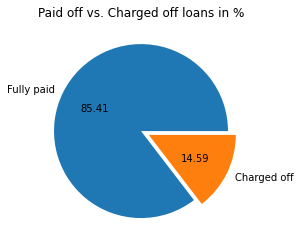

In [17]:
#Visualising the difference in %
plt.pie([paid.loan_status.count(), charged_off.loan_status.count()],
labels=['Fully paid', 'Charged off'],
autopct='%.2f',
explode=(0,0.1))

plt.title('Paid off vs. Charged off loans in %')

In [18]:
#checking the purpose of loans given out
purposeofloan=df.purpose.value_counts()
print(purposeofloan)

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64


Text(0.5, 1.0, 'Purpose of loan')

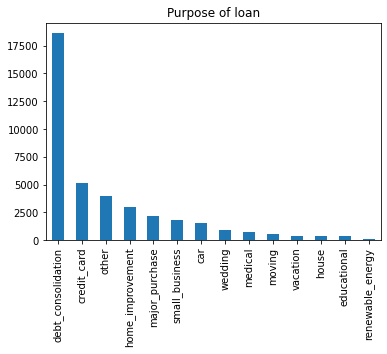

In [19]:
# visualise different purposes for different
purposeofloan.plot(kind='bar')
plt.title('Purpose of loan')

<AxesSubplot:xlabel='purpose', ylabel='loan_status'>

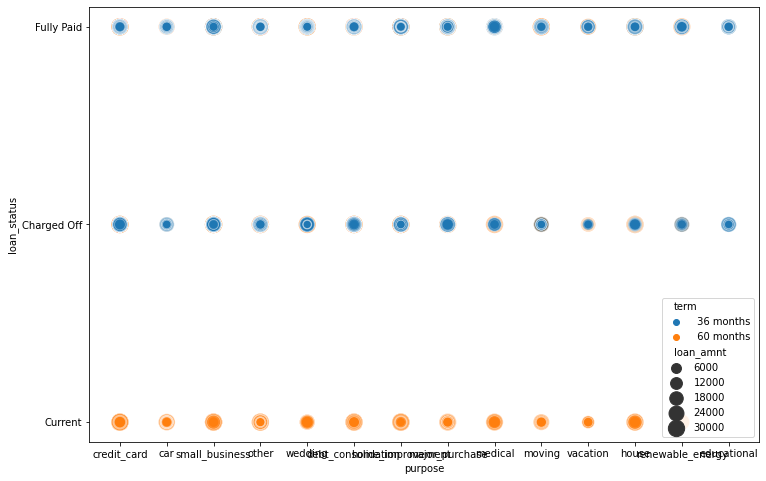

In [20]:
plt.figure(figsize=(12, 8))


sns.scatterplot(x = "purpose", y = "loan_status", 
                 hue = "term",
                     alpha = 0.5, size = "loan_amnt", sizes = (60, 300),
                     
                 data = df)

In [21]:
purposetop5=df['purpose'].value_counts()[:5]

In [22]:
print(purposetop5)

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
Name: purpose, dtype: int64


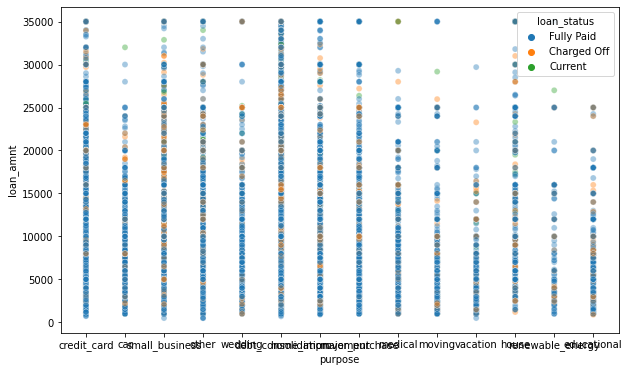

In [23]:


plt.figure(figsize=(10, 6))
#Scatter plot
ax = sns.scatterplot(x ='purpose',
                    y = 'loan_amnt',
                    hue = "loan_status",
                    data = df,
                     
                     legend="full",
                     alpha = 0.4
                    )

plt.show()

In [24]:
piv=pd.pivot_table(df, index=['purpose'],values=['loan_amnt'])

<AxesSubplot:ylabel='purpose'>

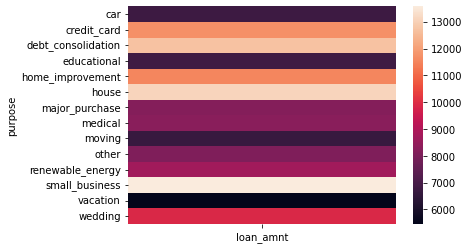

In [25]:
sns.heatmap(piv)

In [ ]:
from math import pi
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
fig, ax = plt.subplots(figsize=(6, 6))
ax = plt.subplot(projection='polar')
data = [82, 75, 91]
startangle = 90
colors = ['#4393E5', '#43BAE5', '#7AE6EA']
xs = [(i * pi *2)/ 100 for i in data]
ys = [-0.2, 1, 2.2]
left = (startangle * pi *2)/ 360 #this is to control where the bar starts
# plot bars and points at the end to make them round
for i, x in enumerate(xs):
    ax.barh(ys[i], x, left=left, height=1, color=colors[i])
    ax.scatter(x+left, ys[i], s=350, color=colors[i], zorder=2)
    ax.scatter(left, ys[i], s=350, color=colors[i], zorder=2)
    
plt.ylim(-4, 4)
# legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Group A', markerfacecolor='#4393E5', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='Group B', markerfacecolor='#43BAE5', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='Group C', markerfacecolor='#7AE6EA', markersize=10)]
ax.legend(handles=legend_elements, loc='center', frameon=False)
# clear ticks, grids, spines
plt.xticks([])
plt.yticks([])
ax.spines.clear()
plt.show()